# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Write your question here.* <br>what proportion of artists on spotify are rock

*If you are planning to perform a hypothesis test, please also write your null and alternative hypotheses in this cell.*

## 📖 My Study 

- *What type of observational study will you be performing (retrospective or prospective)?*
- *What population will you be studying?*
- *What variables will you focus on in your study?*
- *How do you plan on collecting data?*
    - *What sampling technique will you use?*
    - *How will you ensure your data collection is random?*
- *What is one source of bias that may impact the results of your study?*

i will be performing a retrospective observational study
my population will be all of spotifys songs 
i will be focusing on the song type like rap
i plan on using spotifys api to scan through a 10 songs finding the proportion of that 1000 times.
one bias that might come up is spotify producing the same song when randomized.

## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

In [5]:
import requests
import random
import string

# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "45bf291d68a54e1a8bedc3a19335711f"
SPOTIFY_CLIENT_SECRET = "eb3ec30ffa4042938c9aa2e72db1dad0"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

headers = dict(
    Authorization="Bearer " + access_token
)
print("working")
total_count = 0
df = []
while total_count < 1000:
    count = 0
    rock_count = 0
    while count < 10:
        def get_random_track_id():
            # Spotify search requires at least 1 character
            # Use random letters to simulate randomness
            letter = random.choice(string.ascii_lowercase)
        
            url = "https://api.spotify.com/v1/search"
            params = dict(
                q=letter,
                type="track",
                market="US",
                limit=50
            )
        
            response = requests.get(url, headers=headers, params=params)
            data = response.json()
        
            tracks = data.get("tracks", dict()).get("items", [])
        
            if not tracks:
                return None
        
            track = random.choice(tracks)
            return track.get("id")
        
        def get_artist_genres(artist_id):
            url = "https://api.spotify.com/v1/artists/" + artist_id
            data = requests.get(url, headers=headers).json()
            return data.get("genres", [])
        
        def is_rock(genres):
            for g in genres:
                if "rock" in g.lower():
                    return True
            return False
        
        # ---- RUN THE RANDOM CHECK ----
        
        # ---- GET A RANDOM TRACK ID (WITH OFFSET) ----

        letter = random.choice(string.ascii_lowercase)
        offset = random.randint(0, 950)
        
        url = "https://api.spotify.com/v1/search"
        params = {
            "q": letter,
            "type": "track",
            "market": "US",
            "limit": 50,
            "offset": offset
        }
        
        response = requests.get(url, headers=headers, params=params)
        data = response.json()
        
        tracks = data.get("tracks", {}).get("items", [])
        
        if not tracks:
            print("Could not fetch random track")
            continue  # skip this iteration safely
        
        track = random.choice(tracks)
        track_id = track.get("id")

        
        if track_id is None:
            print("Could not fetch random track")
        else:
            track_url = "https://api.spotify.com/v1/tracks/" + track_id
            track_data = requests.get(track_url, headers=headers).json()
        
            track_name = track_data.get("name")
            artist = track_data.get("artists", [dict(name="Unknown", id="")])[0]
        
            artist_name = artist.get("name")
            artist_id = artist.get("id")
        
            genres = get_artist_genres(artist_id)
            if is_rock(genres):
                rock_count += 1
            count += 1
    print(rock_count/count)
    df.append(rock_count/count)
    total_count += 1

working
0.1
0.0
0.0
0.0
0.2
0.0
0.1
0.0
0.1
0.0
0.0
0.0
0.0
0.2
0.1
0.0
0.0
0.1
0.1
0.0
0.0
0.2
0.0
0.0
0.0
0.3
0.0
0.2
0.0
0.1
0.1
0.0
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2
0.2
0.0
0.1
0.0
0.2
0.1
0.0
0.1
0.1
0.1
0.2
0.1
0.0
0.1
0.0
0.0
0.1
0.1
Could not fetch random track
0.0
0.1
0.1
0.0
0.0
0.1
0.1
0.0
0.2
0.1
0.1
0.0
0.1
0.1
0.1
0.0
0.1
0.1
0.1
0.2
0.1
0.0
0.0
0.1
0.0
0.1
0.0
0.2
0.0
0.1
0.0
0.0
0.1
0.0
0.1
0.0
0.0
0.0
0.1
0.0
0.1
0.1
0.0
0.0
0.1
0.0
0.2
0.1
0.1
0.1
0.0
0.0
0.1
0.2
0.0
0.0
0.1
0.0
0.0
0.1
0.1
0.0
0.2
0.0
0.0
0.1
0.1
0.1
0.0
0.3
0.0
0.1
0.0
0.0
0.0
0.0
0.1
0.0
0.0
0.3
0.1
0.1
0.1
0.0
0.1
0.2
0.1
0.2
0.0
0.0
0.0
0.0
0.0
0.2
0.1
0.0
0.0
0.0
0.2
0.1
0.0
0.1
0.1
0.1
0.1
0.0
0.0
0.1
0.0
0.1
0.1
0.0
0.0
0.1
0.0
0.1
0.1
0.0
0.2
0.0
0.0
0.1
0.0
0.1
0.3
0.0
0.2
0.1
0.0
0.0
0.0
0.1
0.0
0.0
0.0
0.0
0.1
0.0
0.1
0.2
0.1
0.2
0.1
0.2
0.2
0.0
0.1
0.1
0.1
0.2
0.0
0.2
0.1
0.0
0.0
0.0
0.1
0.1
0.0
0.1
0.0
0.1
0.0
0.1
0.0
0.0
0.0
0.0
0.0
0.1
0.0
0.0
0.1

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [6]:
print(df)

[0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.3, 0.0, 0.2, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.1, 0.0, 0.2, 0.1, 0.0, 0.1, 0.1, 0.1, 0.2, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.2, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.2, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.2, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.2, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.3, 0.1, 0.1, 0.1, 0.0, 0.1, 0.2, 0.1, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.2, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.1, 0.3, 0.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.1,

## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

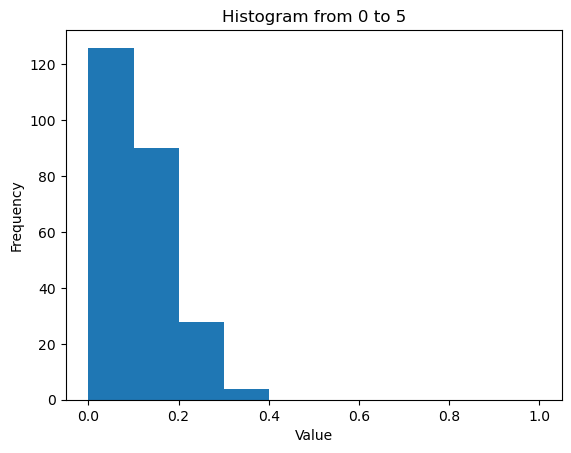

my Mean is: 0.06370967741935472
my STD is: 0.07441674002984904
Mean = 0.340
95% CI = (0.250, 0.430)


In [7]:
import matplotlib.pyplot as plt
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.hist(df, bins = bins)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram from 0 to 5")
plt.show()

import numpy as np
print("my Mean is:",sum(df) / len(df))
print("my STD is:",np.std(df))
from scipy import stats

data = [0.3, 0.3, 0.3, 0.6, 0.1, 0.3, 0.4, 0.3, 0.4, 0.4]
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=1)  # sample standard deviation

confidence = 0.95
t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)

margin_error = t_value * (std / np.sqrt(n))
ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"Mean = {mean:.3f}")
print(f"95% CI = ({ci_lower:.3f}, {ci_upper:.3f})")

## 🧠 My Answer

*Write your answer here.* <br>

*Remember to interpret the specific values that you found in your analysis. It may help to pretend like I have never heard of the population you are studying and have no idea how to interpret the analysis you performed.*

 
with a mean of 34% and a STD of about 9.4% i am 95% confident that the amount of artists that classify themself as rock is between 25% and 43% of all artists.